# Model  1

Only 55% accuracy, I need to add more features.  Cross validation verifies that 55% is the accuracy.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
amazon_review1 = pd.read_table("amazon_cells_labelled.txt")
#amazon_review1 = pd.read_table("imdb_labelled.txt")
amazon_review1.columns = ["review", "negative"]
#amazon_review1.iloc[:,0].str.split(expand=True).stack().value_counts() < 2
negative_words = ['disappointed', 'waste', 'worst', 'slow', 'poor', 'unreliable', 'avoid', 'do not','junk', 'disappointment',
                 'mistake', 'does not', 'wrong', 'disappointing', 'difficult', 'a piece of']
positive_words = []

for word in negative_words:
    amazon_review1[str(word)] = amazon_review1['review'].str.contains(' ' + str(word) + ' ', case=False)
    amazon_review1['allcaps'] = amazon_review1['review'].str.isupper()

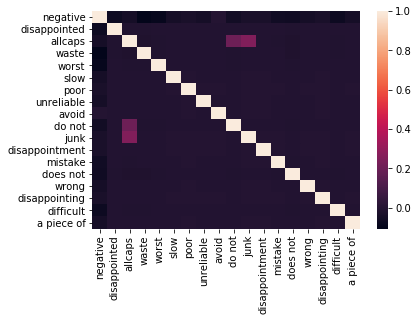

In [2]:
sns.heatmap(amazon_review1.corr())

In [3]:
data = amazon_review1[negative_words + ['allcaps']]
target = amazon_review1['negative']
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
amazon_review1['negative'].value_counts()
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

Number of mislabeled points out of a total 999 points : 444


array([[ 64, 435],
       [  9, 491]], dtype=int64)

In [4]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.55
Testing on Sample: 0.5555555555555556


In [5]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.55      , 0.52      , 0.58      , 0.55      , 0.55      ,
       0.56      , 0.55      , 0.5       , 0.58      , 0.57575758])

# Model 2
I added the features "don't", 'broke', 'look elsewhere', "doesn't", this brought the accuracy rate up to 58% (3 points)

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
amazon_review2 = pd.read_table("amazon_cells_labelled.txt")
#amazon_review1 = pd.read_table("imdb_labelled.txt")
amazon_review2.columns = ["review", "negative"]
#amazon_review1.iloc[:,0].str.split(expand=True).stack().value_counts() < 2
negative_words2 = ['disappointed', 'waste', 'worst', 'slow', 'poor', 'unreliable', 'avoid', 'do not','junk', 'disappointment',
                 'mistake', 'does not', 'wrong', 'disappointing', 'difficult', 'a piece of', "don't", 'broke', 'look elsewhere',
                  "doesn't"]
positive_words = []

for word in negative_words2:
    amazon_review2[str(word)] = amazon_review2['review'].str.contains(' ' + str(word) + ' ', case=False)
    amazon_review2['allcaps'] = amazon_review2['review'].str.isupper()

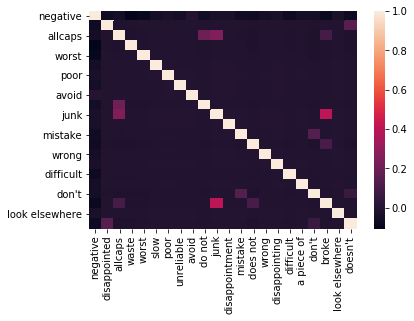

In [7]:
sns.heatmap(amazon_review2.corr())

In [8]:
data2 = amazon_review2[negative_words2 + ['allcaps']]
target2 = amazon_review2['negative']
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred2 = bnb.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred2).sum()
))
amazon_review2['negative'].value_counts()
from sklearn.metrics import confusion_matrix
confusion_matrix(target2, y_pred2)

Number of mislabeled points out of a total 999 points : 427


array([[ 87, 412],
       [ 15, 485]], dtype=int64)

In [9]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, target2, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train2, y_train2).score(X_test2, y_test2)))
print('Testing on Sample: ' + str(bnb.fit(data2, target2).score(data2, target2)))

With 20% Holdout: 0.58
Testing on Sample: 0.5725725725725725


In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data2, target2, cv=10)

array([0.58      , 0.54      , 0.58      , 0.55      , 0.57      ,
       0.57      , 0.59      , 0.51      , 0.61      , 0.57575758])

# Model 3 
I added the features  'not purchase', 'not work', 'problem', 'terrible', 'not recommend', 'awful', 'failed', 'will not' this brought the accuracy rate up to 59% (1 point)

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
amazon_review3 = pd.read_table("amazon_cells_labelled.txt")
#amazon_review1 = pd.read_table("imdb_labelled.txt")
amazon_review3.columns = ["review", "negative"]
#amazon_review1.iloc[:,0].str.split(expand=True).stack().value_counts() < 2
negative_words3 = ['disappointed', 'waste', 'worst', 'slow', 'poor', 'unreliable', 'avoid', 'do not','junk', 'disappointment',
                 'mistake', 'does not', 'wrong', 'disappointing', 'difficult', 'a piece of', "don't", 'broke', 'look elsewhere',
                  "doesn't", 'not purchase', 'not work', 'problem', 'terrible', 'not recommend', 'awful', 'failed', 'will not']
positive_words = []

for word in negative_words3:
    amazon_review3[str(word)] = amazon_review3['review'].str.contains(' ' + str(word) + ' ', case=False)
    amazon_review3['allcaps'] = amazon_review3['review'].str.isupper()

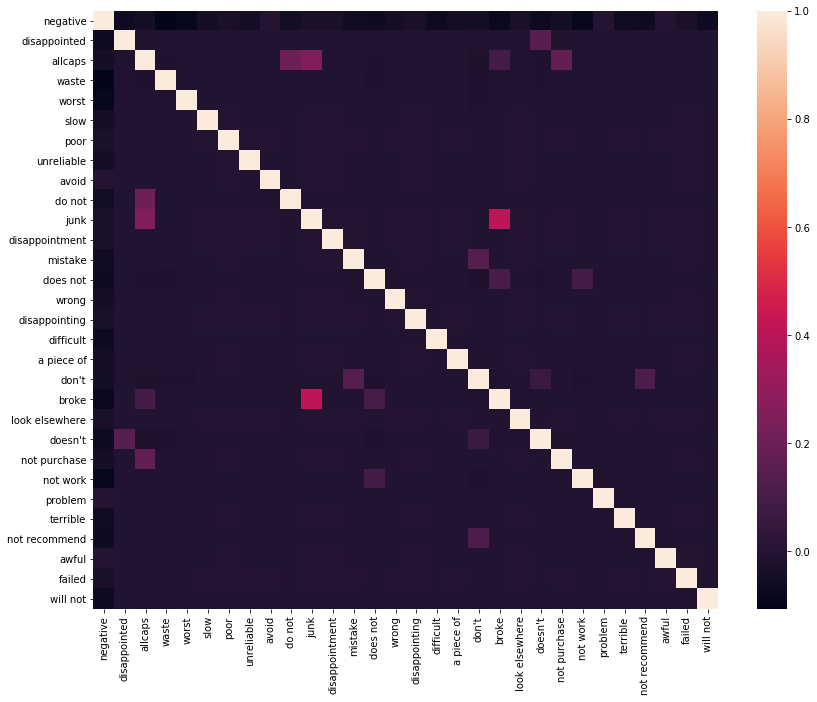

In [12]:
# Make the correlation matrix.

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))
sns.heatmap(amazon_review3.corr())

In [13]:
data3 = amazon_review3[negative_words3 + ['allcaps']]
target3 = amazon_review3['negative']
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data3, target3)

# Classify, storing the result in a new variable.
y_pred3 = bnb.predict(data3)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != y_pred3).sum()
))
amazon_review3['negative'].value_counts()
from sklearn.metrics import confusion_matrix
confusion_matrix(target3, y_pred3)

Number of mislabeled points out of a total 999 points : 409


array([[105, 394],
       [ 15, 485]], dtype=int64)

In [14]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train3, X_test3, y_train3, y_test3 = train_test_split(data3, target3, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train3, y_train3).score(X_test3, y_test3)))
print('Testing on Sample: ' + str(bnb.fit(data3, target3).score(data3, target3)))

With 20% Holdout: 0.59
Testing on Sample: 0.5905905905905906


In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data3, target3, cv=10)

array([0.58      , 0.54      , 0.58      , 0.58      , 0.59      ,
       0.58      , 0.62      , 0.55      , 0.61      , 0.57575758])

# Model 4
Added features "can't", 'could not', this did not change the accuracy rate at all.

In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
amazon_review4 = pd.read_table("amazon_cells_labelled.txt")
#amazon_review1 = pd.read_table("imdb_labelled.txt")
amazon_review4.columns = ["review", "negative"]
#amazon_review1.iloc[:,0].str.split(expand=True).stack().value_counts() < 2
negative_words4 = ['disappointed', 'waste', 'worst', 'slow', 'poor', 'unreliable', 'avoid', 'do not','junk', 'disappointment',
                 'mistake', 'does not', 'wrong', 'disappointing', 'difficult', 'a piece of', "don't", 'broke', 'look elsewhere',
                  "doesn't", 'not purchase', 'not work', 'problem', 'terrible', 'not recommend', 'awful', 'failed', 'will not',
                  "can't", 'could not']
positive_words = []

for word in negative_words4:
    amazon_review4[str(word)] = amazon_review4['review'].str.contains(' ' + str(word) + ' ', case=False)
    amazon_review4['allcaps'] = amazon_review4['review'].str.isupper()

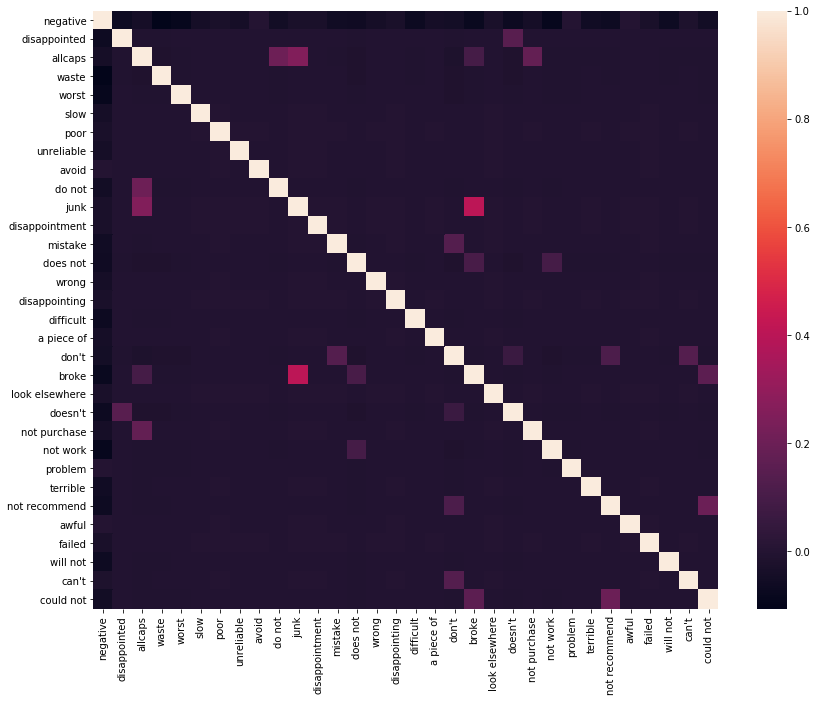

In [17]:
# Make the correlation matrix.

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))
sns.heatmap(amazon_review4.corr())

In [18]:
data4 = amazon_review4[negative_words4 + ['allcaps']]
target4 = amazon_review4['negative']
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data4, target4)

# Classify, storing the result in a new variable.
y_pred4 = bnb.predict(data4)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target4 != y_pred4).sum()
))
amazon_review4['negative'].value_counts()
from sklearn.metrics import confusion_matrix
confusion_matrix(target4, y_pred4)

Number of mislabeled points out of a total 999 points : 407


array([[109, 390],
       [ 17, 483]], dtype=int64)

In [19]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train4, X_test4, y_train4, y_test4 = train_test_split(data4, target4, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train4, y_train4).score(X_test4, y_test4)))
print('Testing on Sample: ' + str(bnb.fit(data4, target4).score(data4, target4)))

With 20% Holdout: 0.59
Testing on Sample: 0.5925925925925926


In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data4, target4, cv=10)

array([0.59      , 0.55      , 0.58      , 0.58      , 0.59      ,
       0.58      , 0.63      , 0.55      , 0.61      , 0.56565657])

# Model 5
Removed the feature "can't" and added 'drains', 'not ready', 'never', 'complaint'. I also removed the required space from the beginning of the feature word, I noticed that many of the negative reviews actually start with the feature word, so these reviews weren't being picked up by my search.  I attempted to filter out reviews that had positive words (see the code below) but I couldn't figure out how to get the code to work, and I needed to move on to the next assignment.  This model has an accuracy rate of 66%.

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
amazon_review5 = pd.read_table("amazon_cells_labelled.txt")
#amazon_review1 = pd.read_table("imdb_labelled.txt")
amazon_review5.columns = ["review", "negative"]
#amazon_review1.iloc[:,0].str.split(expand=True).stack().value_counts() < 2
negative_words5 = ['disappointed', 'waste', 'worst', 'slow', 'poor', 'unreliable', 'avoid', 'do not','junk', 'disappointment',
                 'mistake', 'does not', 'wrong', 'disappointing', 'difficult', 'a piece of', "don't", 'broke', 'look elsewhere',
                  "doesn't", 'not purchase', 'not work', 'problem', 'terrible', 'not recommend', 'awful', 'failed', 'will not',
                  'could not', 'drains', 'not ready', 'never', 'complaint']
#positive_words = ['good', 'would recommend', 'very well', 'happy', 'very happy','excellent', 'great', 'best']

for word in negative_words5:
    amazon_review5[str(word)] = amazon_review5['review'].str.contains(str(word) + ' ', case=False)
    amazon_review5['allcaps'] = amazon_review5['review'].str.isupper()
#for goodword in positive_words:
#    amazon_review5 = amazon_review5[~amazon_review5['review'].str.contains(' ' + str(goodword) + ' ', case=False)]

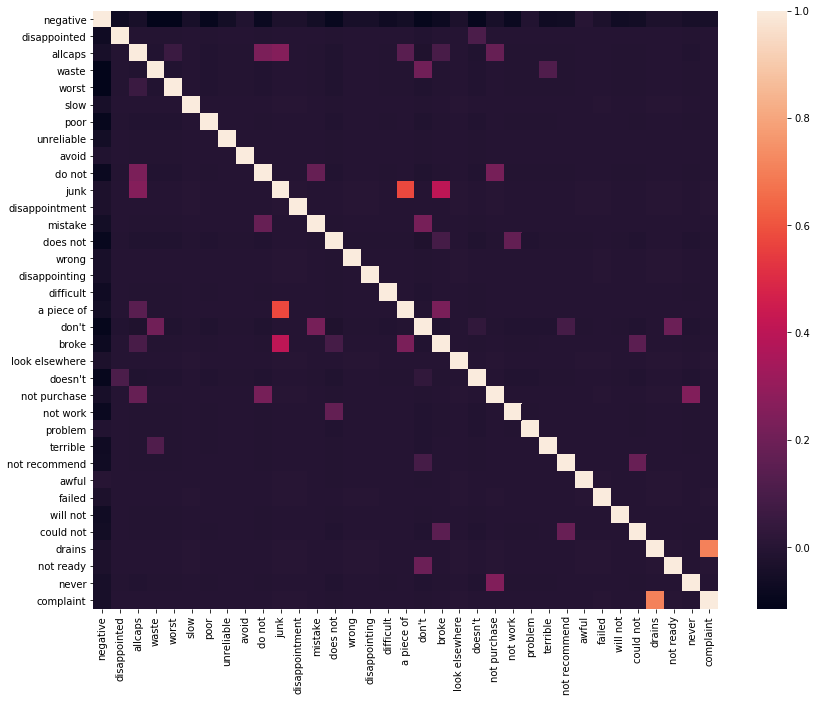

In [22]:
# Make the correlation matrix.

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))
sns.heatmap(amazon_review5.corr())

In [23]:
data5 = amazon_review5[negative_words5 + ['allcaps']]
target5 = amazon_review5['negative']
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data5, target5)

# Classify, storing the result in a new variable.
y_pred5 = bnb.predict(data5)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data5.shape[0],
    (target5 != y_pred5).sum()
))
amazon_review5['negative'].value_counts()
from sklearn.metrics import confusion_matrix
confusion_matrix(target5, y_pred5)

Number of mislabeled points out of a total 999 points : 365


array([[153, 346],
       [ 19, 481]], dtype=int64)

In [24]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train5, X_test5, y_train5, y_test5 = train_test_split(data5, target5, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train5, y_train5).score(X_test5, y_test5)))
print('Testing on Sample: ' + str(bnb.fit(data5, target5).score(data5, target5)))

With 20% Holdout: 0.66
Testing on Sample: 0.6346346346346347


In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data5, target5, cv=10)

array([0.61     , 0.6      , 0.64     , 0.62     , 0.63     , 0.63     ,
       0.69     , 0.59     , 0.66     , 0.5959596])

# Testing against Yelp Reviews

This dropped the accuracy by 10 points from model #5, indicating that model 5 suffers from overfitting.

Number of mislabeled points out of a total 999 points : 404
With 20% Holdout: 0.585
Testing on Sample: 0.5955955955955956


array([0.61      , 0.58      , 0.64      , 0.6       , 0.58      ,
       0.58      , 0.59      , 0.6       , 0.57      , 0.54545455])

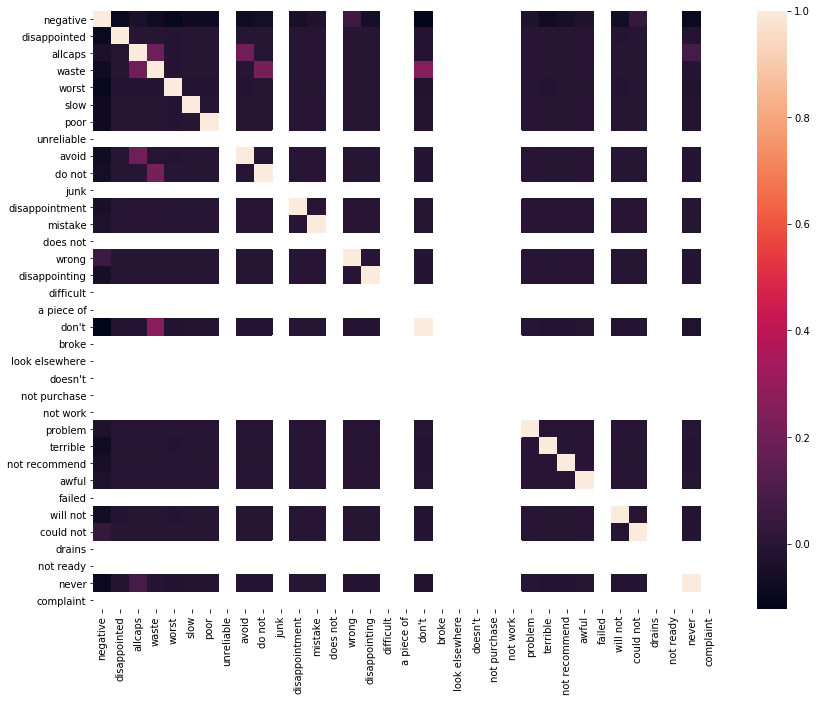

In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
amazon_review6 = pd.read_table("yelp_labelled.txt")
#amazon_review1 = pd.read_table("imdb_labelled.txt")
amazon_review6.columns = ["review", "negative"]
#amazon_review1.iloc[:,0].str.split(expand=True).stack().value_counts() < 2
negative_words6 = ['disappointed', 'waste', 'worst', 'slow', 'poor', 'unreliable', 'avoid', 'do not','junk', 'disappointment',
                 'mistake', 'does not', 'wrong', 'disappointing', 'difficult', 'a piece of', "don't", 'broke', 'look elsewhere',
                  "doesn't", 'not purchase', 'not work', 'problem', 'terrible', 'not recommend', 'awful', 'failed', 'will not',
                  'could not', 'drains', 'not ready', 'never', 'complaint']
#positive_words = ['good', 'would recommend', 'very well', 'happy', 'very happy','excellent', 'great', 'best']

for word in negative_words6:
    amazon_review6[str(word)] = amazon_review6['review'].str.contains(str(word) + ' ', case=False)
    amazon_review6['allcaps'] = amazon_review6['review'].str.isupper()
#for goodword in positive_words:
#    amazon_review6 = amazon_review6[~amazon_review6['review'].str.contains(' ' + str(goodword) + ' ', case=False)]
# Make the correlation matrix.

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))
sns.heatmap(amazon_review6.corr())
data6 = amazon_review6[negative_words6 + ['allcaps']]
target6 = amazon_review6['negative']
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data6, target6)

# Classify, storing the result in a new variable.
y_pred6 = bnb.predict(data6)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data6.shape[0],
    (target6 != y_pred6).sum()
))
amazon_review6['negative'].value_counts()
from sklearn.metrics import confusion_matrix
confusion_matrix(target6, y_pred6)
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train6, X_test6, y_train6, y_test6 = train_test_split(data6, target6, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train6, y_train6).score(X_test6, y_test6)))
print('Testing on Sample: ' + str(bnb.fit(data6, target6).score(data6, target6)))
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data6, target6, cv=10)